In [1]:
# ADATA
import scanpy as sc

# NETWORK
import pandas as pd
import os

# MOTIFS

import numpy as np
from cytoolz import compose
import operator as op
import os
from os import listdir

from pyscenic.utils import load_motifs # Load motifs from step 2
from pyscenic.transform import df2regulons # Used in regulon creation in derive_regulon custom function

# AUCELL 
import json
import zlib
import base64
import loompy as lp
import pandas as pd

# ADATA EXPORT
from pyscenic.export import export2loom, add_scenic_metadata

/opt/venv/lib/python3.10/site-packages/loompy/view_manager.py:23: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if type(slice_) is not tuple or len(slice_) is not 2:


In [2]:
import pickle

In [3]:
DATA_DIR = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/LabelTransfer/adatas/general_adata_postLT.h5ad"
MODULE_DIR = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/04_grn/01Networks/"
MOTIFS_DIR = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/04_grn/03Motifs/"
DB_DIR = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/04_grn/Common_files/databases"
AUCELL_DIR = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/04_grn/04AUCell/"
SAVING_DIR = "/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/04_grn/Results"

In [4]:
regulons_dir = os.path.join(SAVING_DIR, "regulons_dict.pkl")
with open(regulons_dir, "rb") as f:
    regulons = pickle.load(f)

In [5]:
au_dir = os.path.join(SAVING_DIR, "aucells_dict.pkl")
with open(au_dir, "rb") as f:
    aucells = pickle.load(f)

In [9]:
aucells_TNBC = aucells['TNBC']
regulons_TNCB = regulons['TNBC']

In [57]:
import scanpy as sc

In [106]:
adata_1 = sc.AnnData(aucells_TNBC)

/tmp/ipykernel_2680/3734014074.py:1: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_1 = sc.AnnData(aucells_TNBC)


In [108]:
adata_1.obs_names = aucells_TNBC.index.values

In [111]:
adata_1.var_names = aucells_TNBC.columns.values

In [114]:
adata_1.var_names

Index(['ALX3(+)', 'ALX4(+)', 'AR(+)', 'ARID3A(+)', 'ARID5B(+)', 'ATF1(+)',
       'ATF3(+)', 'ATF4(+)', 'ATF5(+)', 'ATF7(+)',
       ...
       'ZNF582(+)', 'ZNF639(+)', 'ZNF652(+)', 'ZNF680(+)', 'ZNF730(+)',
       'ZNF768(+)', 'ZNF823(+)', 'ZNF85(+)', 'ZSCAN31(+)', 'ZSCAN5A(+)'],
      dtype='object', length=290)

In [115]:
sc.pp.pca(adata_1, n_comps = 20)
sc.pp.neighbors(adata_1)
sc.tl.leiden(adata_1)
sc.tl.umap(adata_1)


In [61]:
adata_1

AnnData object with n_obs × n_vars = 59062 × 290
    obs: 'leiden'
    uns: 'pca', 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [84]:
adata_0 = sc.read_h5ad("/home/igarzonalva/Proyecto_SC_TNBC/GSE161529/02_Integration/extra/adata/adata_scanvi_predictions.h5ad")

In [86]:
adata_0

AnnData object with n_obs × n_vars = 152319 × 18088
    obs: 'sample', 'n_genes_by_counts', 'total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'pct_counts_mt', 'complexity', 'doublet_scores', 'predicted_doublets', 'n_genes', 'n_counts', 'celltypist_labels_Immune_All_High', 'celltypist_scores_Immune_All_High', 'celltypist_labels_Cells_Adult_Breast', 'celltypist_scores_Cells_Adult_Breast', 'batch', 'subtype', 'leiden', 'celltypist_labels_Immune_All_High_highconf', 'GenAnno', 'GenAnnoV1', 'GenAnnoV2', 'celltypist_mapped', 'GenAnnoHighConf', 'cell_type', 'predicted_labels', 'GennAnno_ScAnvi'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'GenAnnoHighConf_colors', 'GenAnnoV1_colors', 'GenAnnoV2_colors', 'GennAnno_ScAnvi_colors', 'celltypist_labels_Immune_All_High_highconf_colors', 'hvg', 'leiden', 'leiden_

In [85]:
adata_00 = adata_0[adata_0.obs['subtype'] == 'TNBC',:]

In [88]:
common_cells = aucells_TNBC.index.intersection(adata_00.obs.index)

In [89]:
adata_1.obs.loc[common_cells,'annotation'] = adata_00.obs.loc[common_cells, 'GennAnno_ScAnvi']

/tmp/ipykernel_2680/3662204567.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  adata_1.obs.loc[common_cells,'annotation'] = adata_00.obs.loc[common_cells, 'GennAnno_ScAnvi']


In [90]:
adata_1

AnnData object with n_obs × n_vars = 59062 × 290
    obs: 'leiden', 'annotation'
    uns: 'pca', 'neighbors', 'leiden', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
adata_1.obs.loc[common_cells,'subtype'] = adata_00.obs.loc[common_cells, 'GennAnno_ScAnvi']

/opt/venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/opt/venv/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


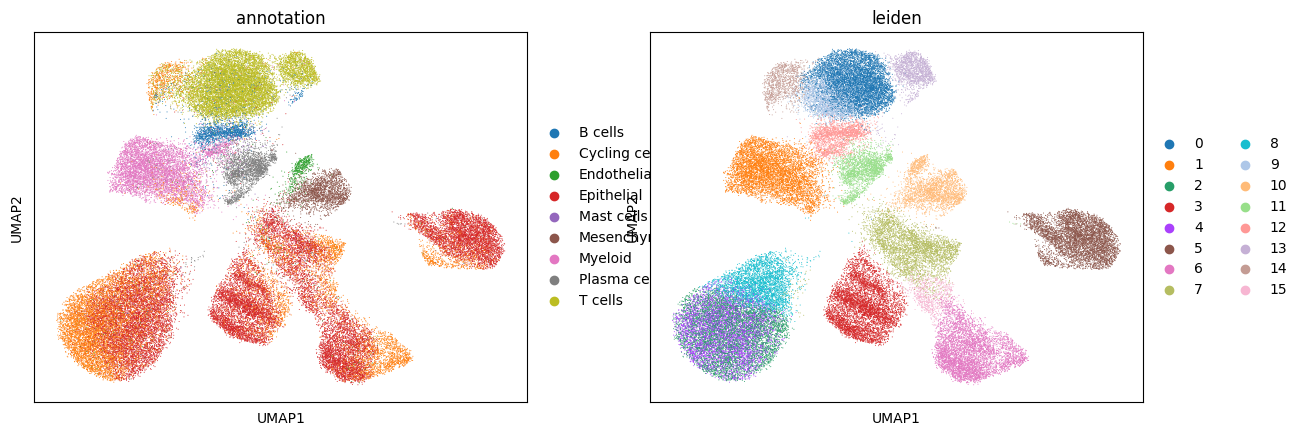

In [92]:
sc.pl.umap(adata_1, color = ['annotation','leiden'])

In [99]:
adata_1[adata_1.obs.leiden == '6',:]

View of AnnData object with n_obs × n_vars = 5003 × 290
    obs: 'leiden', 'annotation'
    uns: 'pca', 'neighbors', 'leiden', 'umap', 'annotation_colors', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [80]:
aucells_TNBC

,ALX3(+),ALX4(+),AR(+),ARID3A(+),ARID5B(+),ATF1(+),ATF3(+),ATF4(+),ATF5(+),ATF7(+),...,ZNF582(+),ZNF639(+),ZNF652(+),ZNF680(+),ZNF730(+),ZNF768(+),ZNF823(+),ZNF85(+),ZSCAN31(+),ZSCAN5A(+)
AAACCCACACCGTGCA-1-B1-Tum0554-,0.000000,0.000000,0.000000,0.000000,0.050405,0.031234,0.128123,0.054969,0.056917,0.026093,...,0.0,0.064927,0.000000,0.0,0.000000,0.009710,0.0,0.000000,0.0,0.0
AAACCCACAGTTTCAG-1-B1-Tum0554-,0.000000,0.000141,0.027229,0.015354,0.084373,0.000000,0.063169,0.032113,0.055700,0.000000,...,0.0,0.047669,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
AAACCCAGTCTGTAAC-1-B1-Tum0554-,0.000000,0.000000,0.051906,0.094049,0.050885,0.000000,0.142628,0.030521,0.078603,0.036439,...,0.0,0.025797,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
AAACCCAGTTGGGATG-1-B1-Tum0554-,0.000000,0.000000,0.000000,0.026217,0.062782,0.000000,0.158800,0.036130,0.088320,0.000000,...,0.0,0.037355,0.107577,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
AAACCCATCGCCACTT-1-B1-Tum0554-,0.007871,0.000362,0.027740,0.000000,0.069502,0.000000,0.114617,0.057746,0.047455,0.012689,...,0.0,0.058746,0.111726,0.0,0.041298,0.000000,0.0,0.008586,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCAAGTTAGGTA-1-MH0126-,0.005956,0.000000,0.047396,0.016239,0.067426,0.012103,0.042196,0.021398,0.048466,0.012298,...,0.0,0.050590,0.046184,0.0,0.000000,0.000000,0.0,0.046882,0.0,0.0
TTTGTCACACGTGAGA-1-MH0126-,0.025485,0.000000,0.000000,0.032323,0.050968,0.000000,0.119003,0.028018,0.111590,0.000000,...,0.0,0.038823,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
TTTGTCACATCGGAAG-1-MH0126-,0.000000,0.000000,0.000000,0.001681,0.018012,0.043988,0.063542,0.055192,0.049628,0.031299,...,0.0,0.092546,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0
TTTGTCATCCCGACTT-1-MH0126-,0.000000,0.002011,0.005020,0.038186,0.060173,0.000000,0.056896,0.031985,0.052262,0.000000,...,0.0,0.046429,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [54]:
regulons_TNCB[0]

Regulon(name='AR', gene2weight=frozendict.frozendict({'TSSC4': 1.656651124518043, 'C21orf2': 1.1479006874015898, 'ZFP62': 0.2903018720183215, 'CDYL2': 0.5553174162537338, 'RARA': 1.6717310831825554, 'KCNK6': 1.435936898898958, 'DLG5': 1.7047006285047914, 'LCMT2': 0.5149624193296216, 'SMARCD3': 1.2234134918011714, 'CHRDL2': 0.7979160537780696, 'SPR': 1.5196410588183915, 'TAF9B': 1.1628595740508771, 'FBXO36': 0.5917669111438837}), gene2occurrence=frozendict.frozendict({}), transcription_factor='AR', context=frozenset({'transfac_pro__M00447.png', 'activating'}), score=3.779742311823039, nes=0.0, orthologous_identity=0.0, similarity_qvalue=0.0, annotation='')

In [55]:
veces = 0
for reg in regulons_TNCB:
    if reg.name == 'ARID5B':
        print(reg.context)


frozenset({'metacluster_130.15.png', 'activating'})


In [34]:
print(len(aucells_TNBC.columns.values))
print(len(set(aucells_TNBC.columns.values)))

290
290


In [36]:
regulon_names = []
for reg in regulons_TNCB:
    regulon_names.append(reg.name)

In [40]:
print(len(regulon_names))
print(len(set(regulon_names)))

135
135


In [28]:
for regulon in regulons_TNCB:
    print(regulon.gene2weight.items())


frozendict.items([('TSSC4', 1.656651124518043), ('C21orf2', 1.1479006874015898), ('ZFP62', 0.2903018720183215), ('CDYL2', 0.5553174162537338), ('RARA', 1.6717310831825554), ('KCNK6', 1.435936898898958), ('DLG5', 1.7047006285047914), ('LCMT2', 0.5149624193296216), ('SMARCD3', 1.2234134918011714), ('CHRDL2', 0.7979160537780696), ('SPR', 1.5196410588183915), ('TAF9B', 1.1628595740508771), ('FBXO36', 0.5917669111438837)])
frozendict.items([('TBC1D4', 1.18814248952644), ('ARID5B', 1.0), ('FOXO1', 1.8396917951753464), ('JMY', 1.26830426859332), ('GEM', 1.1190603401279646), ('LAYN', 1.818309341183907), ('RTKN2', 1.7401396157615134), ('PRDM2', 0.9415462579732352), ('PRDM1', 1.0827270353593896), ('FOXP3', 0.6721069478471113), ('BATF', 1.5290885621474009), ('IKZF2', 0.7761074983987059), ('STAM', 1.609880805308421), ('PHACTR2', 0.6431486202655908)])
frozendict.items([('SNAPC1', 2.284234954979665), ('PIGA', 0.7279390961060414), ('ARIH1', 1.07090173236448), ('ALDH1A3', 0.512536791270642), ('NR4A2',

In [21]:
filas = []

for subtipo, lista_regulones in regulons.items():
    for regulon in lista_regulones:
        for gen, puntaje in regulon.gene2weight.items():
            filas.append({
                'subtipo': subtipo,
                'regulon_name': regulon.name,
                'gen': gen,
                'puntaje': puntaje
            })
df_genes_regulones = pd.DataFrame(filas)

AttributeError: 'list' object has no attribute 'names'